In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_dataframe = pd.read_csv('train.csv')

In [3]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

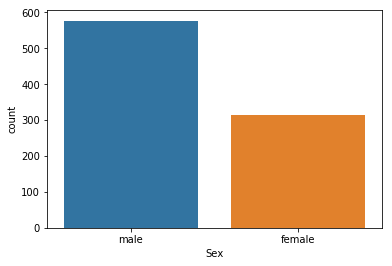

In [5]:
sns.countplot('Sex',data=titanic_dataframe)

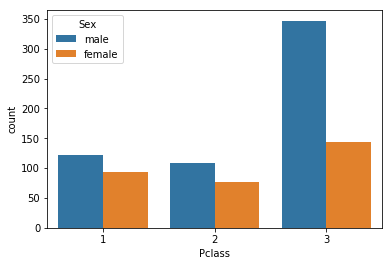

In [6]:
sns.countplot('Pclass',data=titanic_dataframe,hue='Sex')

In [7]:
def child_male_female(passenger):
    
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
titanic_dataframe['person'] = titanic_dataframe[['Age','Sex']].apply(child_male_female,axis=1)

In [9]:
titanic_dataframe[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


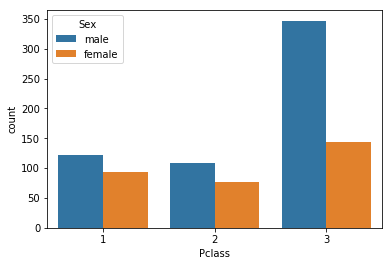

In [10]:
sns.countplot('Pclass',data=titanic_dataframe,hue='Sex')

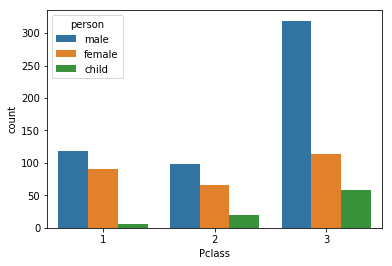

In [11]:
sns.countplot('Pclass',data=titanic_dataframe,hue='person')

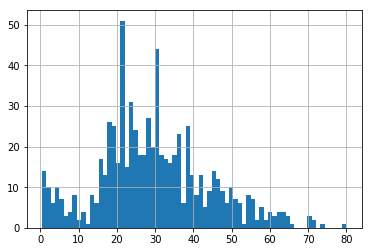

In [13]:
titanic_dataframe['Age'].hist(bins=70)

In [14]:
titanic_dataframe['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

/Users/halilkacmaz/DeepNN/anaconda2/envs/Data1-27/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


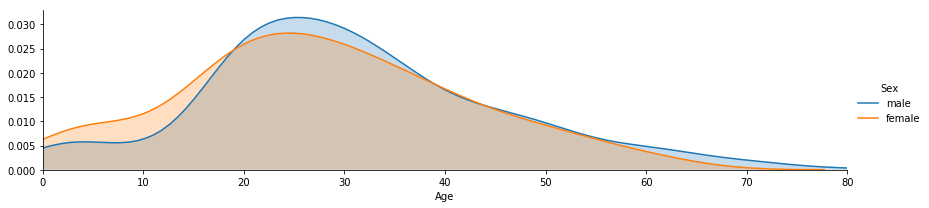

In [20]:
fig = sns.FacetGrid(hue='Sex',data=titanic_dataframe,aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_dataframe['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

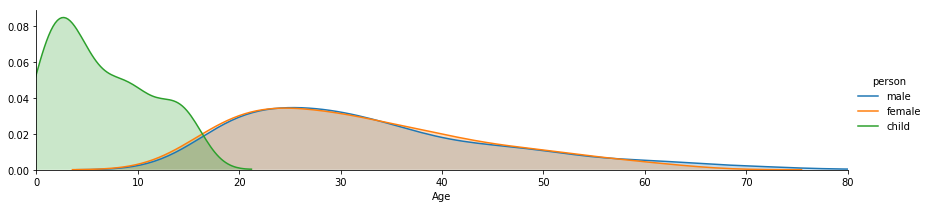

In [21]:
fig = sns.FacetGrid(hue='person',data=titanic_dataframe,aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_dataframe['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

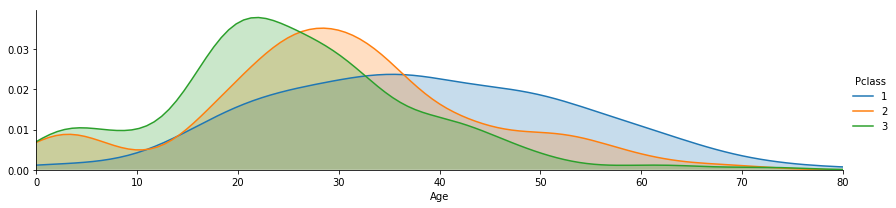

In [22]:
fig = sns.FacetGrid(hue='Pclass',data=titanic_dataframe,aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_dataframe['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [23]:
# Let's get a quick look at our dataset again
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [25]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_dataframe['Cabin'].dropna()

In [26]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [27]:
levels = []

for level in deck:
    levels.append(level[0])
    
levels.sort()

In [29]:
cabin_df = DataFrame(levels)

In [30]:
cabin_df.head()

,0
0,A
1,A
2,A
3,A
4,A


In [31]:
cabin_df.columns = ['Cabin']

In [32]:
cabin_df.head()

,Cabin
0,A
1,A
2,A
3,A
4,A


In [34]:
cabin_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

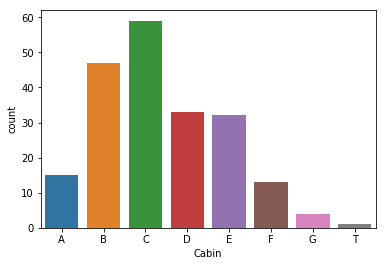

In [35]:
sns.countplot('Cabin',data=cabin_df)

In [38]:
cabin_df = cabin_df[cabin_df['Cabin']!='T']

In [39]:
cabin_df['Cabin'].value_counts() #remove T, beacuse it was just 1 count. no need to display

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Cabin, dtype: int64

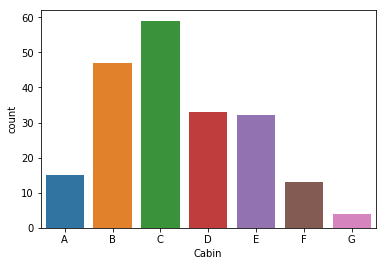

In [40]:
#now re display again.
sns.countplot('Cabin',data=cabin_df)